In [2]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from sklearn.decomposition import PCA

In [5]:
model_path = "../models/check_point.h5"
image_test = "../dataset/fashion mnist paper/split/image_test.npy"
speckle_test = "../dataset/fashion mnist paper/split/speckle_test.npy"

In [6]:
image = np.load(image_test)
print(image.shape)
speckle = np.load(speckle_test)
print(speckle.shape)
model = load_model(model_path)
model.summary()

(3000, 32, 32, 1)
(3000, 128, 128, 1)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         1049600     input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1024)         4096        dense[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 1024)         0           batch_normalization[0][0]        
________________________________________________________

In [7]:
X_train = np.load("../dataset/fashion mnist paper/split/speckle_train.npy")
X_train = np.reshape(X_train, (11000, 16384))
speckle =  np.reshape(speckle, (3000, 16384))

pca = PCA(n_components=1024)
X_train = pca.fit_transform(X_train)
speckle = pca.transform(speckle)

-0.9921568627450981


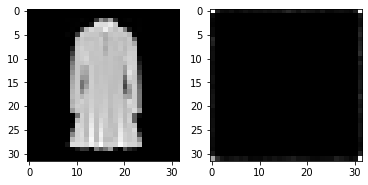

In [15]:
num = 29

pred = model.predict(speckle[num:num+1])
# pred = np.reshape(pred, (1, 32, 32, 1))
# plt.imshow(speckle[num,:,:,0], cmap='gray')
# plt.show()

plt.subplot(1, 2, 1)
plt.imshow(image[num,:,:,0], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(pred[0,:,:,0], cmap='gray')
plt.show()

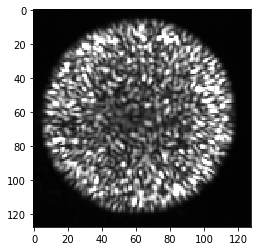

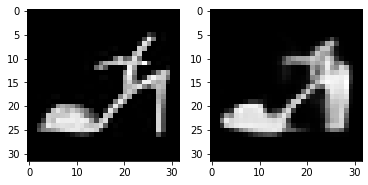

In [25]:
num = 710

pred = model.predict(speckle[num:num+1])
plt.imshow(speckle[num,:,:,0], cmap='gray')
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(image[num,:,:,0], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(pred[0,:,:,0], cmap='gray')
plt.show()